In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [35]:
# Parameters settings
w = np.random.uniform(0, 1, size=(25, 2))
# initial width
sig0 = np.sqrt(1**2 + w.shape[1]**2)/2
sigma = sig0
iteration = 50000
tau1 = iteration/np.log(sig0)
tau2 = iteration
lr0 = 0.1
lr = lr0

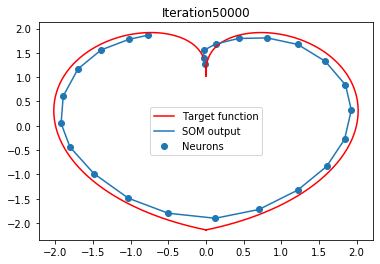

In [36]:
# heart curve
ts = np.linspace(-math.pi, math.pi, 200)
trainX = np.array(([np.dot(t, np.sin(math.pi*np.sin(t)/t)) for t in ts],[1 - np.dot(abs(t), np.cos(math.pi*np.sin(t)/t)) for t in ts]))
# SOM
for i in range(iteration):
    # sampling
    idx = np.random.randint(0, trainX.shape[1])
    # Competition
    dist = np.linalg.norm(trainX[:, idx] - w, axis = 1)
    min_idx = np.argmin(dist)
    min_dist = min(dist)
    # Adaption
    for j in range(w.shape[0]):
        dist = (j - min_idx)**2
        h = np.exp(-dist/(2*sigma**2))
        w[j, :]= w[j, :] + lr*h*(trainX[:, idx] - w[j, :])
    if i == 0:
        continue
    lr = lr0*np.exp(-i/tau2)
    sigma = sig0*np.exp(-i/tau1)

plt.plot(trainX[0, :], trainX[1, :], color = 'r', label = 'Target function')
plt.plot(w[:,0], w[:, 1], label = 'SOM output')
plt.scatter(w[:,0], w[:, 1], label = 'Neurons')
plt.legend()
plt.title("Iteration"+ str(iteration))
plt.savefig('3_figures/'+'3a_' + str(iteration)+'.png')
plt.show()